## Objective
 - To write code base necessary to do data analysis and produce a machine learning model to perform topic modelling and sentiment analysis
###  Required modules at the minimum:
1. Data exploration 
2. Pre-processing 
3. Visualisations.


### Import liberaries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import nltk
import warnings
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sys, os


### Load Data

In [3]:
sys.path.append(os.path.abspath(os.path.join('../..')))

In [4]:
raw_data = pd.read_csv('../data/processed_tweet_data.csv')

### 1. Explore The Data

#### 1.1 Check The size of The Data

In [13]:
raw_data.shape

(24625, 15)

#### 1.2 Explore the first and the last values of the data

In [8]:
raw_data.head(3)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,2356,355,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,1985,505,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,16,4,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN


In [9]:
raw_data.tail(3)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
24622,Fri Apr 22 14:44:35 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @Parthtiwari25: Gujarat Congress MLA arrest...,0.0,0.0,en,1025,203,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'Parthtiwari25', 'name': 'Par...",NaN
24623,Fri Apr 22 14:44:08 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...,0.0,0.0,hi,3735,301,kitukalesatya,706,643,False,[],"[{'screen_name': 'news24tvchannel', 'name': 'N...",NaN
24624,Fri Apr 22 14:43:01 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @suvegrathi: भगवान और खुदा आपस में बात कर र...,0.0,0.0,hi,10,12,kitukalesatya,706,643,False,[],"[{'screen_name': 'suvegrathi', 'name': 'Suveg ...",NaN


#### 1.3 Check the columns ans their data type

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24625 non-null  object 
 1   source              24625 non-null  object 
 2   original_text       24625 non-null  object 
 3   polarity            24625 non-null  float64
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      24625 non-null  int64  
 7   retweet_count       24625 non-null  int64  
 8   original_author     24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9854 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       24625 non-null  object 
 14  place               15731 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.8+

#### 1.4 Check for missed values

In [34]:
raw_data.isna().mean()

created_at            0.000000
source                0.000000
original_text         0.000000
polarity              0.000000
subjectivity          0.000000
lang                  0.000000
favorite_count        0.000000
retweet_count         0.000000
original_author       0.000000
followers_count       0.000000
friends_count         0.000000
possibly_sensitive    0.599838
hashtags              0.000000
user_mentions         0.000000
place                 0.361178
dtype: float64

#### 1.5 Get some insights from individual attr

- follower based

In [39]:
feed_count = raw_data['followers_count'].value_counts()
feed_count

1        252
9        200
40       200
24       180
0        157
        ... 
7895      20
40306     20
181       10
15654     10
1207      10
Name: followers_count, Length: 458, dtype: int64

- freinds based

In [40]:
feed_count = raw_data['friends_count'].value_counts()
feed_count

0        402
36       257
4        197
1        188
44       176
        ... 
7892      20
652       20
4729      20
41866     20
640       10
Name: friends_count, Length: 419, dtype: int64

- see the top authors

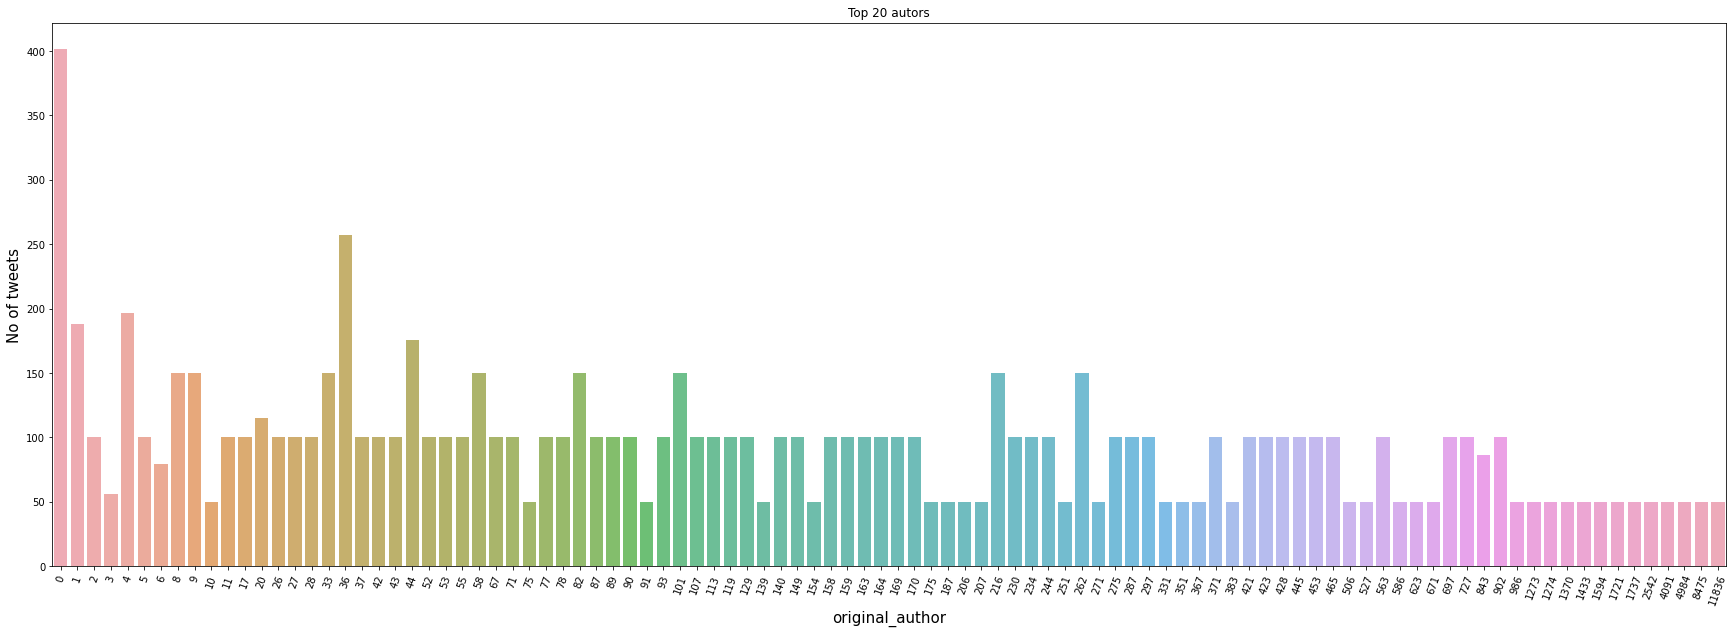

In [42]:
feed_count = feed_count[:100,]
plt.figure(figsize=(30,10))
sns.barplot(feed_count.index , feed_count.values, alpha = 0.8)
plt.title("Top 20 autors")
plt.ylabel('No of tweets', fontsize = 15)
plt.xlabel('original_author', fontsize = 15)
plt.xticks(rotation=70)
plt.show()